In [2]:
print("hellooo!")

hellooo


> ## Sampling and reconstruction:
> ## Comparing Shannon reconstruction, issues of oversampling and undersampling

### Introduction
- The sampling process produces a discrete time signal by examining the value of the continuous signal at equally spaced points in time.  Reconstruction attempts to perform an reverse process that produces a continuous time signal coinciding with the points of the discrete time signal. 
- Because the sampling process for general sets of signals is not one to one, there are numerous possible reconstructions from a given discrete time signal, each of which would sample to that signal at the appropriate sampling rate. 
- If certain additional assumptions about the original signal and sampling rate hold, then the original signal can be recovered exactly from its samples. More specifically, it can be shown that if a bandlimited signal is sampled at a rate greater than twice its bandlimit, the Whittaker-Shannon reconstruction formula perfectly reconstructs the original signal.

### Whittaker-Shannon interpolation formula

- Also called sinc interpolation, the Whittaker–Shannon interpolation formula is a method to construct a continuous-time bandlimited signal from a sequence of discrete samples.
- The formulation is stated as:




<img src="ws_form1.png" width="990" height="440" alt="alt text">


### Nyquist sampling theorem
- The Nyquist theorem states that in order to accurately reconstruct a continuous-time signal from its samples, the sampling frequency must be at least twice the highest frequency component present in the signal. Mathematically, it can be expressed as:


​
 

<img src="nq_form.png" width="220" height="120" alt="alt text">

where fs is the sampling rate and fmax the maximum frequency present in signal

- The signal is said to be oversampled when it is sampled at a rate higher than the Nyquist rate (twice the highest frequency component of the signal). It is usually used when high precision and accuracy are required. 
- Undersampling occurs when the signal is sampled at a rate lower than the Nyquist rate.

### Aliasing
- Aliasing is an underisable effect seen in sampling of signals. When the signal is undersampled, there is an overlapping of frequency components resulting in distortion and artifacts when the signal is reconstructed from the samples.
- It can be avoided by applying anti-aliasing filters which are essentially low pass filters to the input signal before sampling.

### Methodology 
- For the purpose of this tutorial an audio file is loaded with a sampling rate of 30 kHz. By analysing it in the frequency domain, the maximum frequency having an intensity >200 found. Henceforth the signal is bandlimited to this frequency by using a low-pass filter. Also, any noise is filtered out by removing frequencies having <10 psd. Thereafter the signal is sampled thrice, one time each at a rate less than, equal to and greater than the Nyquist rate. For each case the signal is reconstructed at the original sampling rate and analysed in the time as well as the frequency domain. 

In [24]:
#importing the requisite libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import librosa


In [26]:
#loading the audio file as the sample signal for the tutorial 

y_orig, s = librosa.load("pianos.mp3", sr=None)  #original mp3 file without any subsampling, sr is 44.1 kHz
y1, s1 = librosa.load("pianos.mp3", duration=1.0, sr=30000) #mp3 file loaded after downsampling to 30 kHz, used here


30000


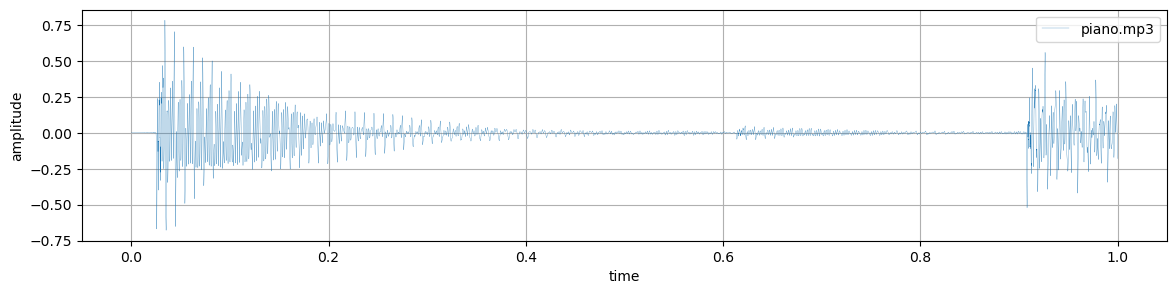

In [5]:
#plotting the original signal
ts1 = np.arange(0.0, len(y1)*(1/s1), 1/s1)

fig = plt.figure(figsize =(14, 3))
ax1 = plt.subplot((111))


ax1.plot(ts1, y1, label ='piano.mp3',  linewidth=0.2)
ax1.set_xlabel('time', fontsize=10)
ax1.set_ylabel('amplitude', fontsize=10)
ax1.grid(True)
ax1.legend(loc='best')

plt.show()


In [7]:
#finding maximum frequency contained in the signal having an intensity of 200 using FFT on the signal
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

sample_rate = s1
duration = ts1[-1] 

N = int(sample_rate*duration) +1 

yf = fft(y1[:-1])
xf = fftfreq(N-1, 1/sample_rate)

peaks, _ = find_peaks(yf, distance =100)  #indices of the  peak frequencies (separated by 100 samples) will be stored in peaks
fmax = 0 
for j in peaks:
    p = np.abs(yf[j])  #intensity of a particular frequency
    if p>200:
    #  print(xf[j])
     if xf[j]>0:
      fmax = np.real(xf[j])

# plt.plot(xf, np.abs(yf))
# plt.show()

print(fmax)  


524.0174672489082


c:\Users\fragg\anaconda3\Lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


In [8]:
#noise-filtering
n = len(y1)

fft1 = np.fft.fft(y1, n) #computes fourier coefficient for each component

psd = fft1*np.conj(fft1)/n  #intensity of each frequency component 

_mask = psd < 10

fft1 = _mask*fft1 #filtering out the noise in the signal

y1_filtered  = np.fft.ifft(fft1) #taking inverse fourier transform to convert into time domain

y1_filtered = y1_filtered.real



In [9]:
#designing a low-pass digital filter and using it to bandlimit the signal
sos = signal.butter(50, 524.01, 'lp', fs=s1, output='sos') #max frequency with >200 intensity is 524.01 Hz

y_filtered = signal.sosfiltfilt(sos, y1) #low-pass filter with threshold frequency 524.01 Hz

print(s1)


30000


30000


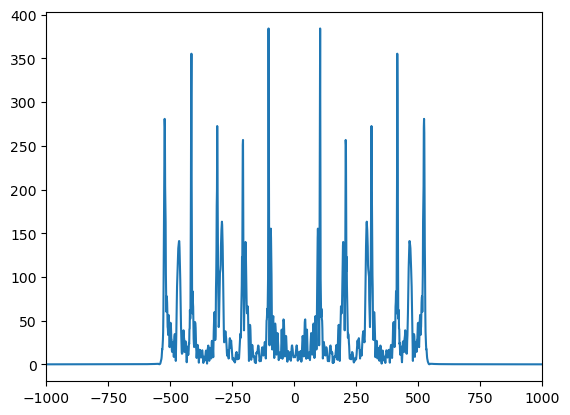

In [10]:
#defining function for performing FFT on the signal to plot its frequency spectrum
def computefft(ys, ts, s1):
    
    sample_rate = s1   #filtered digital signal in the frequency domain has been obtained, bandlimited to (-524.02 Hz, 524.02 Hz)
    duration = ts1[-1] #sampling rate being 30000 Hz 
    
    N = int(sample_rate*duration) +1
    print(N)
    yf = fft(ys[:-1])
    xf = fftfreq(N-1, 1/sample_rate)
    ax2 = plt.subplot((111))
    peaks, _ = find_peaks(yf, distance =100)  #indices of the  peak frequencies (separated by 100 samples) will be stored in peaks
    fmax = 0 
    ax2.set_xlim((-1000, 1000))
    plt.plot(np.fft.fftshift(xf), np.fft.fftshift(np.abs(yf)))
    plt.show()
computefft(y_filtered, ts1, s1)

In [11]:
fm = 524.01
ws = 2*fm #nyquist rate
ws1 = ws-100  #undersampling frequency
ws2 = ws+100  #oversampling frequency 


524.01
1048 1048
1048


c:\Users\fragg\anaconda3\Lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


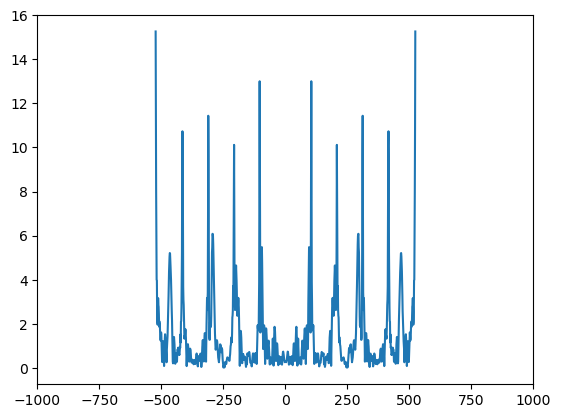

In [18]:
#sampling at nyquist rate
nf = 0.5*ws #nyquist frequency
print(nf)
y11, ts11 = signal.resample(y_filtered, num=int(1.0*ws), t= ts1)
print(len(y11), len(ts11))
computefft(y11, ts11, ws)

474.01
948


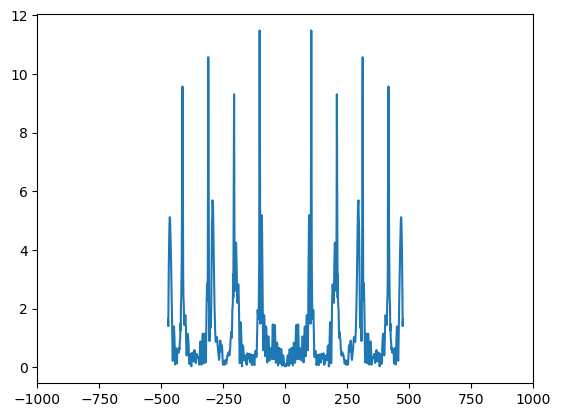

In [16]:
#undersampling
nf1 = ws1/2 
y_u, ts_u = signal.resample(y1, num = int(1.0*ws1), t =ts1)
print(nf1)
computefft(y_u, ts_u, ws1)

574.01
1148


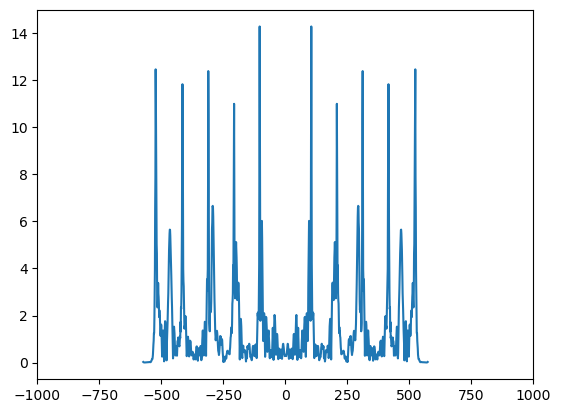

In [19]:
#oversampling
nf2 = ws2/2 
y_o, ts_o =  signal.resample(y_filtered, int(1.0*ws2), ts1)
print(nf2)
computefft(y_o, ts_o, ws2)

In [20]:
#reconstructing the original signal from the y11 signal using Shannon reconstruction formula

dt = 1/s1
l = (int)(1.0/dt)
y11_re = []
ts11_re = []
t = 0
for i in range(l):
    ts11_re.append(t)
    s = 0
    for j in range(int(1.0*nf*2.0)):
      s += y11[j]*np.sinc(2*nf*(t-j/(2*nf))) 
    y11_re.append(s)
    t += dt 
    print(t)

3.3333333333333335e-05
6.666666666666667e-05
0.0001
0.00013333333333333334
0.0001666666666666667
0.00020000000000000004
0.00023333333333333339
0.00026666666666666673
0.0003000000000000001
0.00033333333333333343
0.0003666666666666668
0.00040000000000000013
0.0004333333333333335
0.0004666666666666668
0.0005000000000000001
0.0005333333333333335
0.0005666666666666668
0.0006000000000000002
0.0006333333333333335
0.0006666666666666669
0.0007000000000000002
0.0007333333333333336
0.0007666666666666669
0.0008000000000000003
0.0008333333333333336
0.000866666666666667
0.0009000000000000003
0.0009333333333333336
0.000966666666666667
0.0010000000000000002
0.0010333333333333336
0.001066666666666667
0.0011000000000000003
0.0011333333333333336
0.001166666666666667
0.0012000000000000003
0.0012333333333333337
0.001266666666666667
0.0013000000000000004
0.0013333333333333337
0.001366666666666667
0.0014000000000000004
0.0014333333333333338
0.0014666666666666671
0.0015000000000000005
0.0015333333333333338
0.

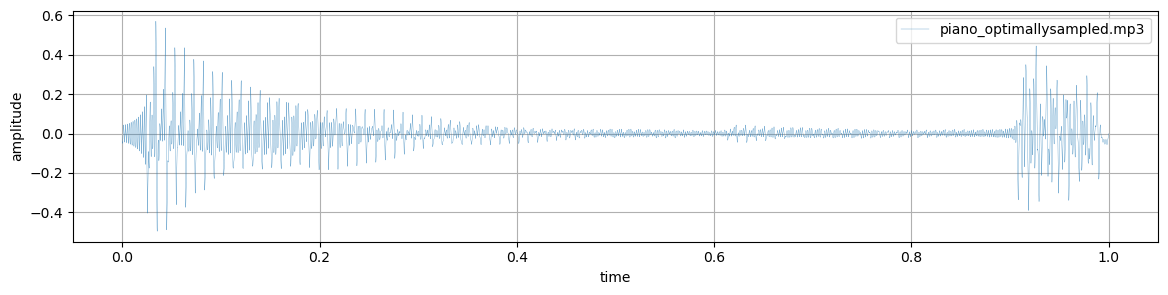

In [21]:
#plotting the 
y11_re1 = np.array(y11_re)
ts11_re1 = np.array(ts11_re)

fig = plt.figure(figsize =(14, 3))
ax1 = plt.subplot((111))


ax1.plot(ts11_re1, y11_re1, label ='piano_optimallysampled.mp3',  linewidth=0.2)
ax1.set_xlabel('time', fontsize=10)
ax1.set_ylabel('amplitude', fontsize=10)
ax1.grid(True)
ax1.legend(loc='best')

plt.show()


30000


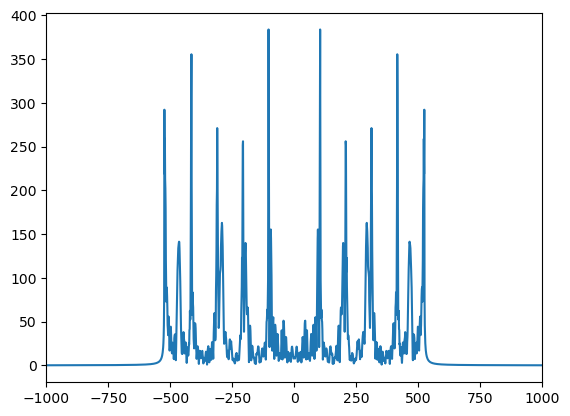

In [22]:
computefft(y11_re1, ts11_re, int(s1))

As is expected, when sampling is performed at the Nyquist rate, all frequency components that appear in the bandlimited signal are preserved in the reconstructed signal with the same relative intensities. 

In [23]:
#reconstructing the original signal from the y_u(undersampled) signal using Shannon reconstruction formula

dt = 1/s1
l = (int)(1.0/dt)
yu_re = []
tu_re = []
t = 0
for i in range(l):
    tu_re.append(t)
    s = 0
    for j in range(int(1.0*nf1*2.0)):
      s += y_u[j]*np.sinc(2*nf1*(t-j/(2*nf1))) 
    yu_re.append(s)
    t += dt 
    print(t)

3.3333333333333335e-05
6.666666666666667e-05
0.0001
0.00013333333333333334
0.0001666666666666667
0.00020000000000000004
0.00023333333333333339
0.00026666666666666673
0.0003000000000000001
0.00033333333333333343
0.0003666666666666668
0.00040000000000000013
0.0004333333333333335
0.0004666666666666668
0.0005000000000000001
0.0005333333333333335
0.0005666666666666668
0.0006000000000000002
0.0006333333333333335
0.0006666666666666669
0.0007000000000000002
0.0007333333333333336
0.0007666666666666669
0.0008000000000000003
0.0008333333333333336
0.000866666666666667
0.0009000000000000003
0.0009333333333333336
0.000966666666666667
0.0010000000000000002
0.0010333333333333336
0.001066666666666667
0.0011000000000000003
0.0011333333333333336
0.001166666666666667
0.0012000000000000003
0.0012333333333333337
0.001266666666666667
0.0013000000000000004
0.0013333333333333337
0.001366666666666667
0.0014000000000000004
0.0014333333333333338
0.0014666666666666671
0.0015000000000000005
0.0015333333333333338
0.

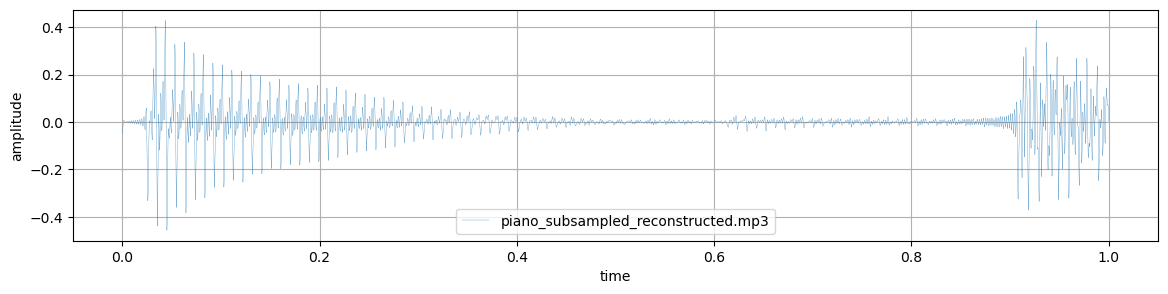

In [27]:
yu_re1 = np.array(yu_re)
tu_re1 = np.array(tu_re)

fig = plt.figure(figsize =(14, 3))
ax1 = plt.subplot((111))


ax1.plot(tu_re1, yu_re1, label ='piano_subsampled_reconstructed.mp3',  linewidth=0.2)
ax1.set_xlabel('time', fontsize=10)
ax1.set_ylabel('amplitude', fontsize=10)
ax1.grid(True)
ax1.legend(loc='best')

plt.show()

30000


c:\Users\fragg\anaconda3\Lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


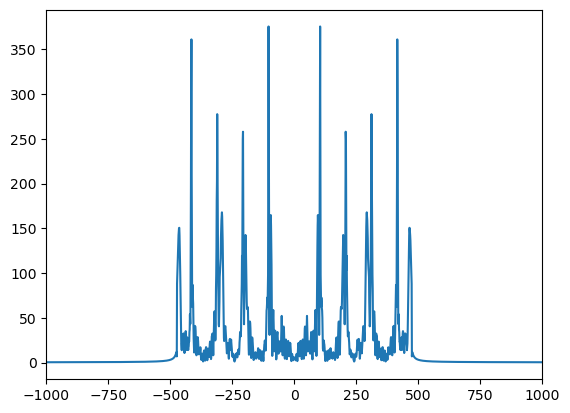

In [28]:
computefft(yu_re1, tu_re1, int(s1))

Undersampling of the original signal causes aliasing i.e. overlapping of the higher frequency components resulting in artifacts wherever high frequencies closer to the bandwidth are present in the signal as is seen from the spectrum around ~500 Hz. 

In [29]:
#reconstructing the original signal from the y_o(oversampled) signal using Shannon reconstruction formula

dt = 1/s1
l = (int)(1.0/dt)
yo_re = []
to_re = []
t = 0
for i in range(l):
    to_re.append(t)
    s = 0
    for j in range(int(1.0*nf2*2.0)):
      s += y_o[j]*np.sinc(2*nf2*(t-j/(2*nf2))) 
    yo_re.append(s)
    t += dt 
    print(t)

3.3333333333333335e-05
6.666666666666667e-05
0.0001
0.00013333333333333334
0.0001666666666666667
0.00020000000000000004
0.00023333333333333339
0.00026666666666666673
0.0003000000000000001
0.00033333333333333343
0.0003666666666666668
0.00040000000000000013
0.0004333333333333335
0.0004666666666666668
0.0005000000000000001
0.0005333333333333335
0.0005666666666666668
0.0006000000000000002
0.0006333333333333335
0.0006666666666666669
0.0007000000000000002
0.0007333333333333336
0.0007666666666666669
0.0008000000000000003
0.0008333333333333336
0.000866666666666667
0.0009000000000000003
0.0009333333333333336
0.000966666666666667
0.0010000000000000002
0.0010333333333333336
0.001066666666666667
0.0011000000000000003
0.0011333333333333336
0.001166666666666667
0.0012000000000000003
0.0012333333333333337
0.001266666666666667
0.0013000000000000004
0.0013333333333333337
0.001366666666666667
0.0014000000000000004
0.0014333333333333338
0.0014666666666666671
0.0015000000000000005
0.0015333333333333338
0.

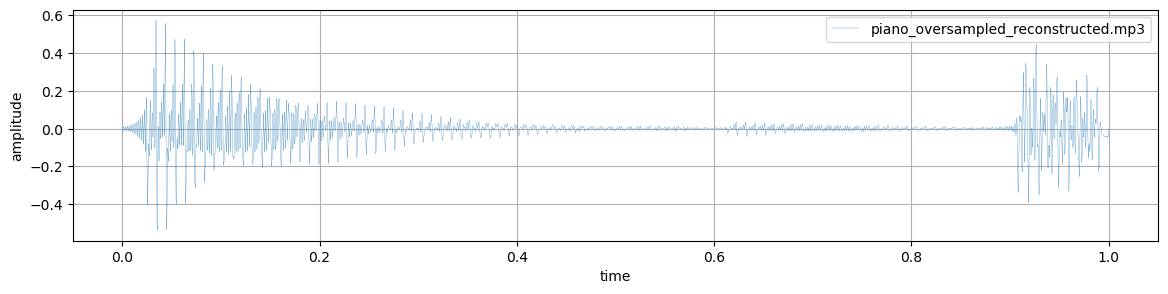

In [30]:
#plotting the reconstructed signal obtained  
yo_re1 = np.array(yo_re)
to_re1 = np.array(to_re)

fig = plt.figure(figsize =(14, 3))
ax1 = plt.subplot((111))


ax1.plot(to_re1, yo_re1, label ='piano_oversampled_reconstructed.mp3',  linewidth=0.2)
ax1.set_xlabel('time', fontsize=10)
ax1.set_ylabel('amplitude', fontsize=10)
ax1.grid(True)
ax1.legend(loc='best')

plt.show()

30000


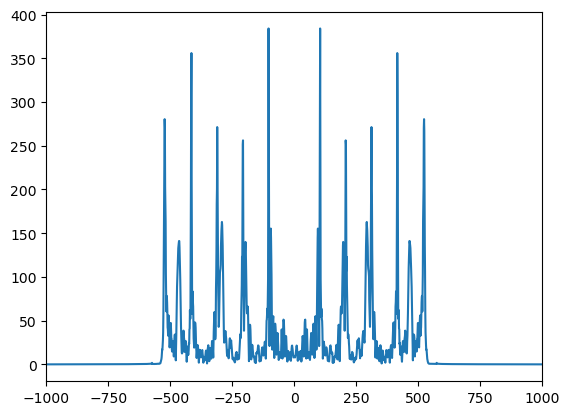

In [31]:
computefft(yo_re1, to_re1, s1)

Oversampling, as inferred from the spectrogram of the reconstructed signal does not cause any artifacts and the bandlimited signal is preserved along with its frequency components and their respective intensities. 

In [63]:
#playing the y11_re signal
import sounddevice as sd

#variables
samplfreq = s1  #the sampling frequency of the audio
factor = 1      #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)

#data
print('..interpolating data')
arr = y11_re1  #perfectly sampled data

#normalise the data to between -1 and 1. 
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

..interpolating data


In [64]:
#playing the yu_re signal
samplfreq = s1  
factor = 1      

#data
print('..interpolating data')
arr = yu_re1  #undersampled data

#normalise the data to between -1 and 1.
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

..interpolating data


In [61]:
#playing the yo_re signal
samplfreq = s1  #the sampling frequency of the audio
factor = 1      #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)

#data
print('..interpolating data')
arr = yo_re1  #oversampled data

#normalise the data to between -1 and 1.
sd.play( arr / np.max(np.abs(arr)), samplfreq*factor)

..interpolating data
